# Predicting YouTube Video Likes Using Deep Learning

## Problem Statement:

YouTube is one of the largest video-sharing platforms, where content creators rely on audience engagement metrics such as likes, views, and comments to measure their success. Deep learning can analyze large-scale YouTube metadata, video features, and historical engagement trends to build a predictive model that estimates the number of likes a video will receive. This can help creators optimize their content strategy, improve audience engagement, and increase monetization opportunities. Simultaneously, this is also a useful tool for brands to analyze and strategically place their YouTube ads.


In [26]:
#Importing python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

## Datasets:

### Dataset 1: YouTube Video Engagement Data
**Description:** This dataset consists of YouTube video metadata, engagement metrics, and categorical features to analyze and predict audience interactions. The primary goal is to predict the ratio of likes to views (target column).


**Source:** [YouTube Video Engagement Data](https://www.kaggle.com/competitions/kaggle-pog-series-s01e01/data?select=train.parquet)


**Justification:** This dataset has features like a unique video id, title, channel name, likes, tags, video description, and comment count. A text analysis of all these factors will help train my model for predicting the likes-to-views ratio.

### Exploratory Analysis:

YouTube Training Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92275 entries, 0 to 92274
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           92275 non-null  object             
 1   title              92275 non-null  object             
 2   publishedAt        92275 non-null  datetime64[us, UTC]
 3   channelId          92275 non-null  object             
 4   channelTitle       92275 non-null  object             
 5   categoryId         92275 non-null  int64              
 6   trending_date      92275 non-null  object             
 7   tags               92275 non-null  object             
 8   view_count         92275 non-null  int64              
 9   likes              92275 non-null  int64              
 10  dislikes           92275 non-null  int64              
 11  comment_count      92275 non-null  int64              
 12  thumbnail_l

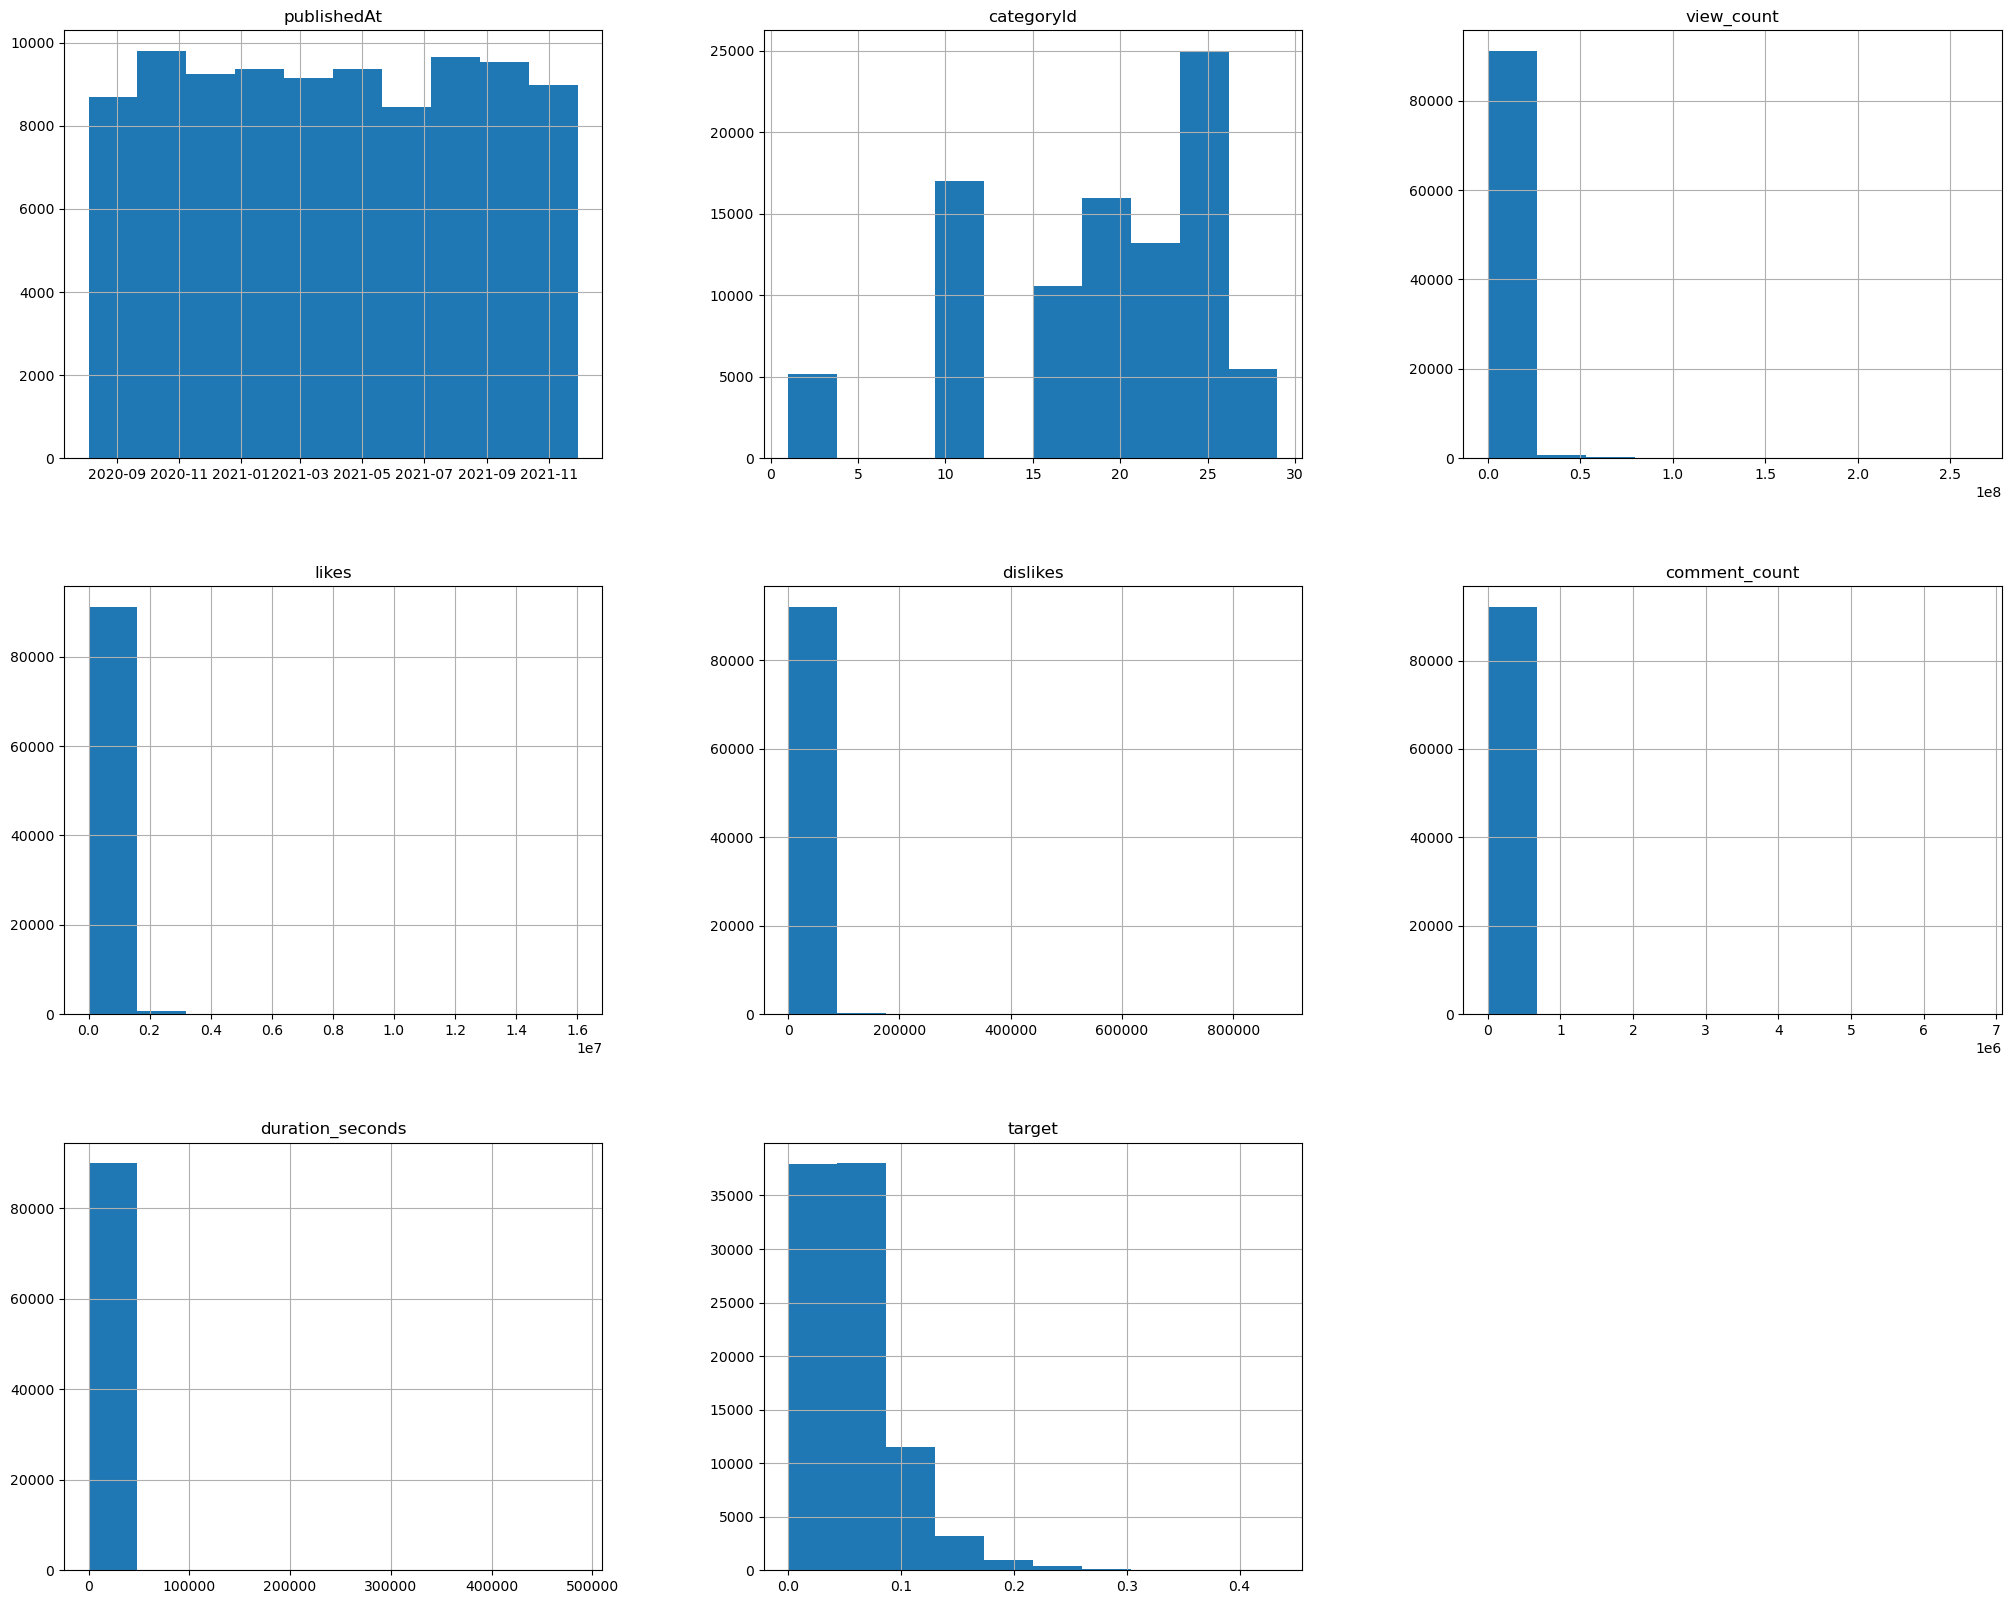

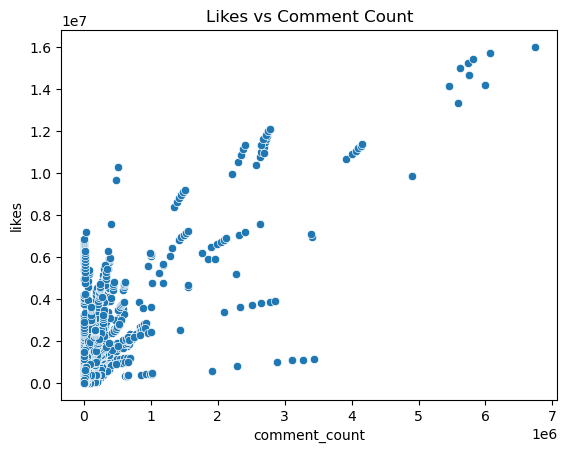

In [31]:
# Load Training dataset
train_df = pd.read_parquet('/Users/km/Downloads/train.parquet')

# Display basic information
print("YouTube Training Dataset Overview:")
print(train_df.info())

print("\n\n")

# Show summary statistics
print("YouTube Training Dataset Summary:")
print(train_df.describe())

print("\n\n")

# Histogram of numerical features
train_df.hist(figsize=(25, 20))
plt.show()

print("\n\n")

# Scatter plot of likes vs comment_count
sns.scatterplot(x=train_df['comment_count'], y=train_df['likes'])
plt.title("Likes vs Comment Count")
plt.show()

print("\n\n")

- This scatterplot helps in understanding how audience engagement varies across videos and displays an overall trend between likes and comment count.
- The points form an upward trend, there’s a positive correlation, meaning videos that get more likes also tend to get more comment

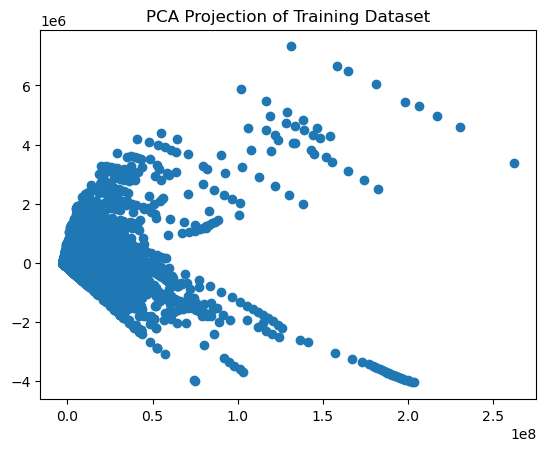

In [33]:
# Apply PCA for dimensionality reduction (modify as needed)
train_df_clean = train_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train_df_clean.select_dtypes(include=[np.number]))

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Projection of Training Dataset")
plt.show()

- PCA helps reduce complex datasets with many variables into just a few principal components, making patterns easier to analyze.
- Most of the data is concentrated in a specific region, meaning the majority of observations share similar characteristics.
- Some data points are spread out, which may indicate varying distributions or different clusters.

### Dataset 2: YouTube Dislikes Dataset
**Description:** This dataset contains the latest possible information about dislikes, which was collected just before December 13, when YouTube stopped sharing dislike information openly. The data was collected from videos that had been trending in the USA, Canada, and Great Britain for a year prior.


**Source:** [YouTube Dislikes Dataset](https://www.kaggle.com/datasets/dmitrynikolaev/youtube-dislikes-dataset)


**Justification:** This dataset contains features like dislike count and comments, which can be used for training neural networks for a viewer Sentiment Analysis. This would play a major role in predicting likes-to-views ratio.

### Exploratory Analysis:




YouTube Dislikes Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB
None



YouTube Dislikes Dataset Summary:
         view_count         likes      dislikes  comment_count
count  3.742200e+04  3.742200e+04  3.742200e+04   3.742200e+04
mean   5.697838e+06  1.668147e+05

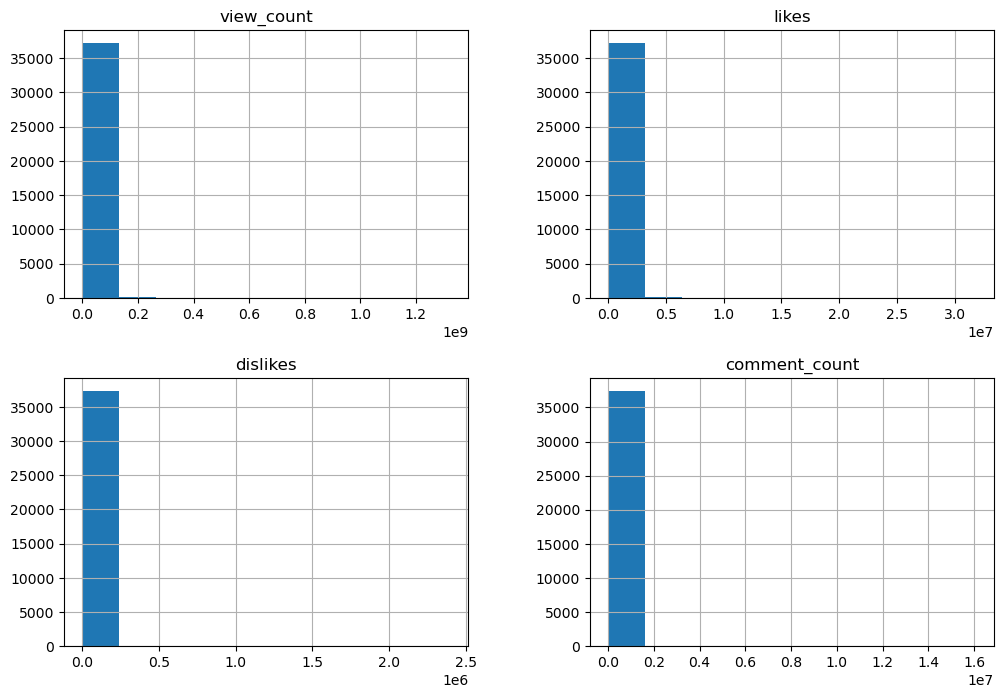

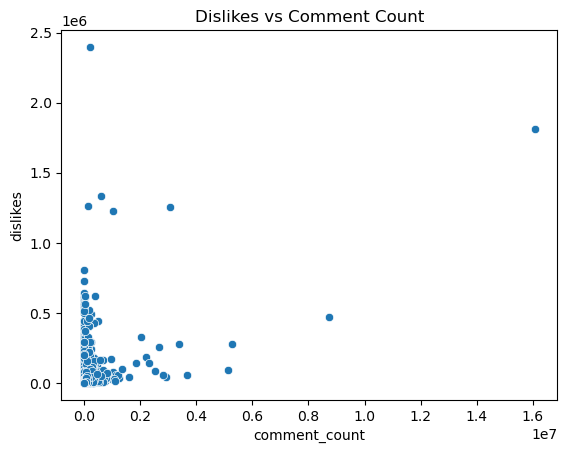

In [39]:
# Load YouTube Dislikes dataset
dislike_df = pd.read_csv("/Users/km/Downloads/youtube_dislike_dataset.csv")

print("\n\n")

# Display basic information
print("YouTube Dislikes Dataset Overview:")
print(dislike_df.info())

print("\n\n")

# Show summary statistics
print("YouTube Dislikes Dataset Summary:")
print(dislike_df.describe())

print("\n\n")

# Histogram of numerical features
dislike_df.hist(figsize=(12, 8))
plt.show()

print("\n\n")

# Scatter plot of dislikes vs comment_count
sns.scatterplot(x=dislike_df['comment_count'], y=dislike_df['dislikes'])
plt.title("Dislikes vs Comment Count")
plt.show()

print("\n\n")

- This scatter plot visualizes the relationship between dislikes and comment count on YouTube videos.
- The majority of videos have low dislikes and low comment counts, indicating that strong negative engagement is rare.

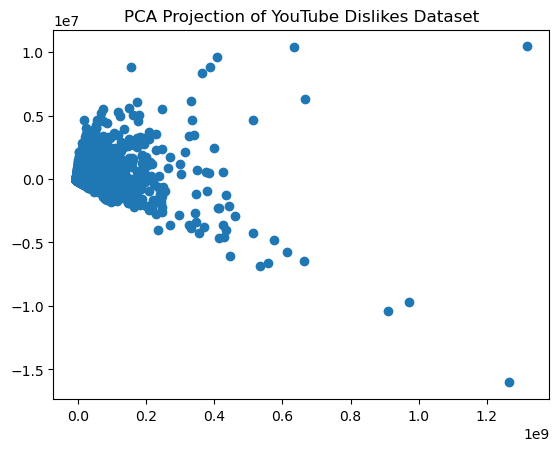

In [41]:
# Apply PCA for dimensionality reduction (modify as needed)
#train_df_clean = dislike_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dislike_df.select_dtypes(include=[np.number]))

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Projection of YouTube Dislikes Dataset")
plt.show()

### Dataset 3: Global YouTube Statistics Data
**Description:** This dataset provides insights into YouTube channel rankings, performance metrics, and country-specific socioeconomic factors. It allows for an in-depth analysis of how different factors contribute to the success of YouTube channels across various regions and categories.


**Source:** [Global YouTube Statistics Data](https://www.kaggle.com/datasets/naniruddhan/global-youtube-statistics-data)


**Justification:** This dataset contains features like top creators' subscriber counts, country of origin, country population, and more, which play a big role in predicting views. A merging of this dataset with the first one will produce interesting trends that will enrich the overall analysis.

### Exploratory Analysis:

Global YouTube Statistics Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  chan

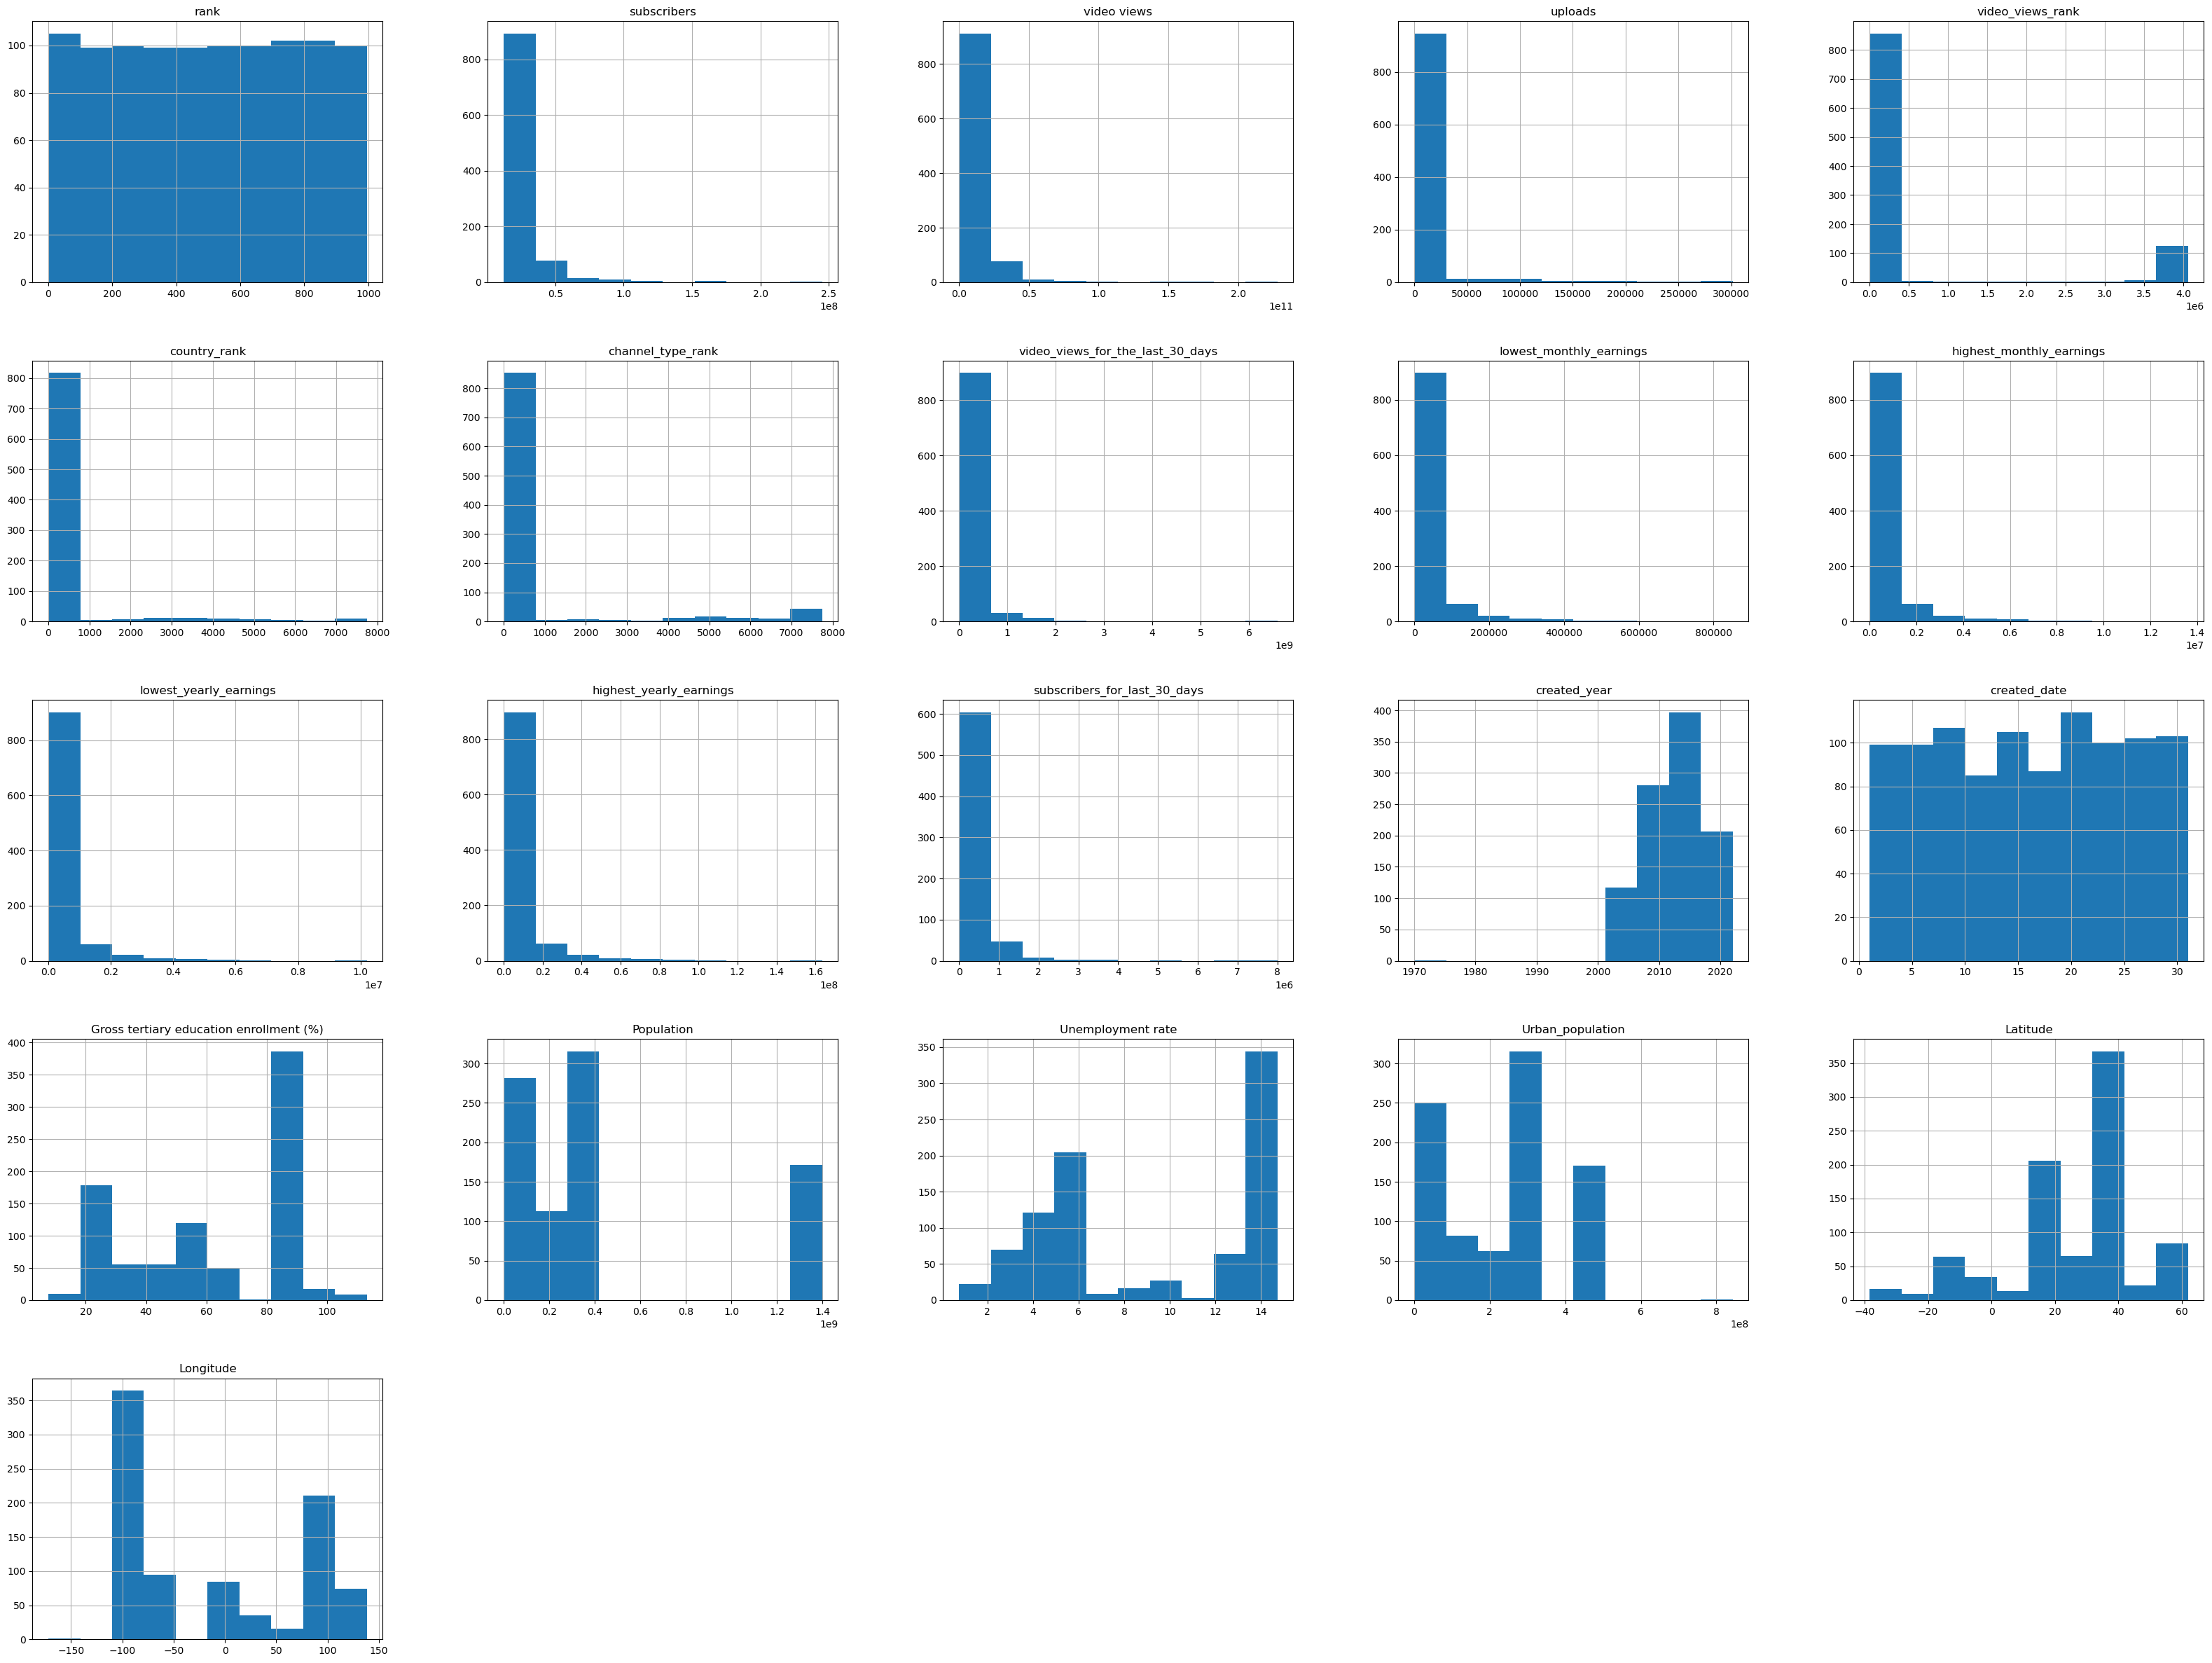

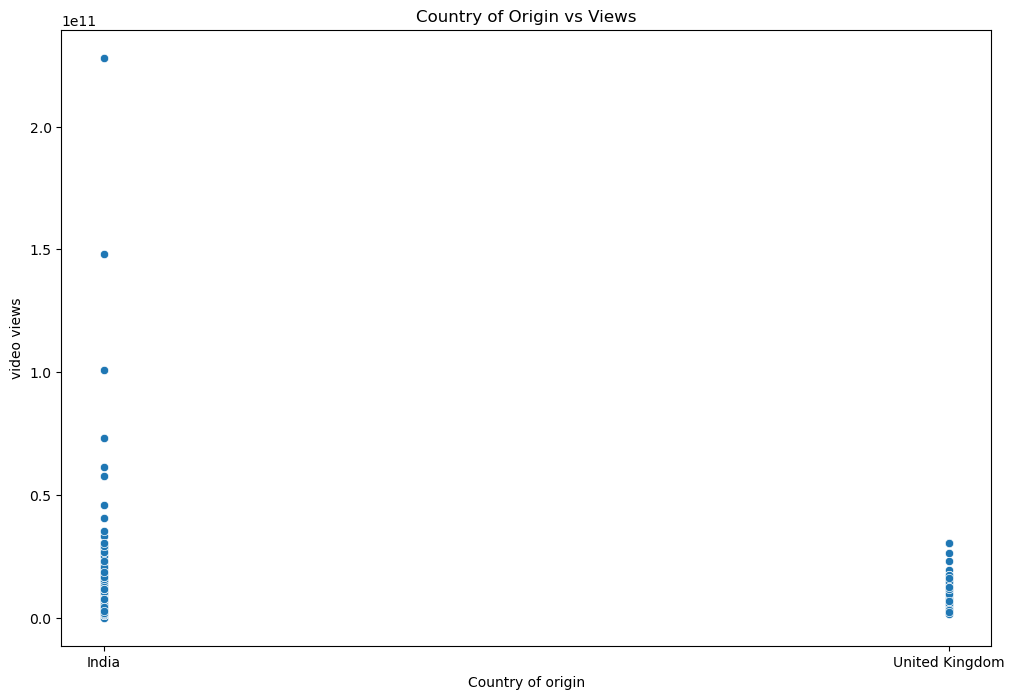

In [51]:
# Load Global YouTube Statistics dataset
#df = pd.read_csv("/Users/km/Downloads/Global YouTube Statistics.csv")
global_stats_df = pd.read_csv("/Users/km/Downloads/Global YouTube Statistics.csv", encoding="ISO-8859-1")

# Display basic information
print("Global YouTube Statistics Dataset Overview:")
print(global_stats_df.info())

# Show summary statistics
print("Global YouTube Statistics Dataset Summary:")
print(global_stats_df.describe())

print("\n\n")

# Histogram of numerical features
global_stats_df.hist(figsize=(40, 30))
plt.show()

print("\n\n")

# Scatter plot of Country of origin vs video views
plt.figure(figsize=(12, 8))
sns.scatterplot(x=global_stats_df.query('`Country of origin` == "India" or `Country of origin` == "United Kingdom"')['Country of origin'], y=global_stats_df['video views'])
plt.title("Country of Origin vs Views")
plt.show()

print("\n\n")

- This scatter plot shows the number of views against the country of origin of that video. This will help me estimate how demographic factors affect views and in turn likes.
- This graph shows that India has more videos with more views compared to United Kingdom, possibly attributing to the large population of users in India.

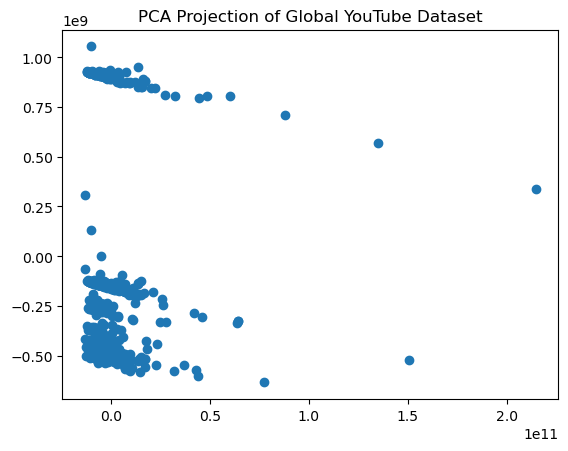

In [53]:
# Apply PCA for dimensionality reduction (modify as needed)
global_stats_df_clean = global_stats_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(global_stats_df_clean.select_dtypes(include=[np.number]))

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Projection of Global YouTube Dataset")
plt.show()

## PyTorch Dataset Implementation

In [66]:
import torch
from torch.utils.data import Dataset

In [68]:
class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_parquet(csv_file)
        self.features = self.data[['video_id', 'title', 'channelId', 'channelTitle', 'dislikes', 'comment_count', 'tags', 'target']].values
        self.labels = self.data['target'].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return x, y

dataset = CustomDataset('/Users/km/Downloads/train.parquet')
print(len(dataset))

92275


In [70]:
class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.features = self.data[['video_id', 'title', 'channel_id', 'channel_title', 'view_count', 'likes', 'dislikes', 'comment_count', 'tags', 'description', 'comments']].values
        self.labels = self.data['likes'].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return x, y

dataset = CustomDataset('/Users/km/Downloads/youtube_dislike_dataset.csv')
print(len(dataset))

37422


In [71]:
class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file, encoding="ISO-8859-1")
        self.features = self.data[['Title', 'video views', 'Country of origin', 'Country', 'country_rank', 'Population', 'Unemployment rate']].values
        self.labels = self.data['video views'].values

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.float32)
        return x, y

dataset = CustomDataset('/Users/km/Downloads/Global YouTube Statistics.csv')
print(len(dataset))

1006
